# Import Dependencies

We begin by importing the necessary libraries

In [1]:
# System & OS
import os

# Data analysis
import numpy as np
import pandas as pd

# ML
from sklearn.cluster import KMeans

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style('white')
sns.set_palette('magma')

# Reproducibility

Set the seed to ensure our results are reproducible.

In [2]:
def set_seed(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

SEED = 11
set_seed(SEED)

# K-means clustering

Then, read in the `world_cities` dataframe. Note, a separate R script was used to export the data into a CSV file.

In [3]:
# Read data & drop irrelevant columns
df = pd.read_csv('../data/world_cities_df.csv')
df.drop(columns='Unnamed: 0', inplace=True)
# Display results
df.head()

,longitude,latitude
0,121.45806,31.22222
1,28.94966,41.01384
2,-58.37723,-34.61315
3,72.88261,19.07283
4,-99.12766,19.42847


It remains to apply k-means clustering to the data for various values of k.

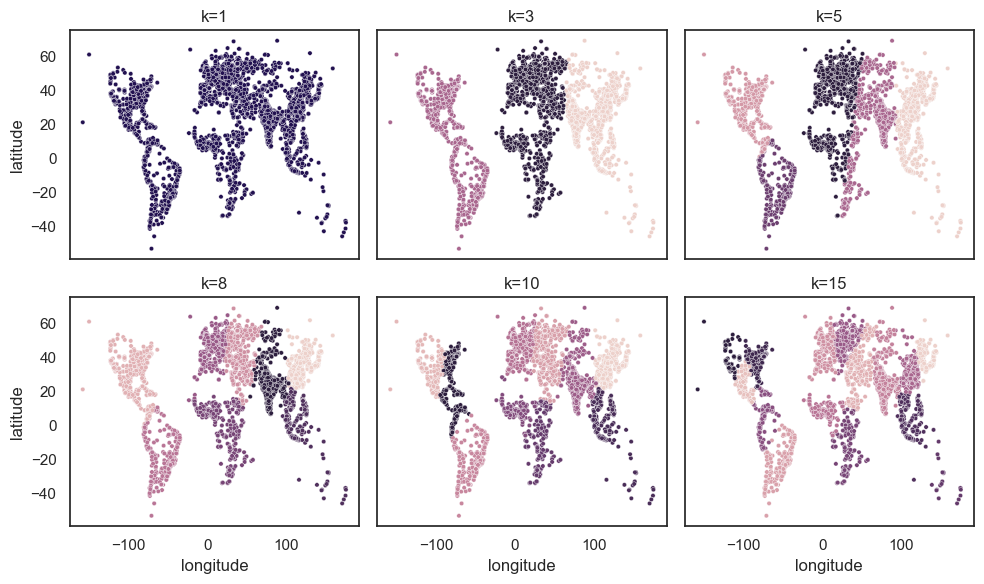

In [4]:
# Create list of candidate k-values
candidate_k = [1, 3, 5, 8, 10, 15]

# Create figure
fig, ax = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
ax = ax.flatten()

# Iterate through each value of k
for i, k in enumerate(candidate_k):
    # Fit the k-means clustering model to df
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=SEED).fit(df)
    # Extract cluster labels
    df['cluster'] = kmeans.labels_
    # Create scatter plot
    sns.scatterplot(data=df, x='longitude', y='latitude', hue='cluster', s=10, legend=False, ax=ax[i])
    # Specify k-value in subplot title
    ax[i].set_title(f'k={k}')

# Display results
plt.tight_layout()
plt.savefig('../k_means_clustering.png', format='png')
plt.show()

Notice that for smaller values of k, there are no meaningful clusters of note; as k increases, we begin to see the familiar regional boundaries take shape, with increasing granularity. At the highest extreme (k=15), we can distinguish between Northern and Southern Africa; Eastern, Central, and Western Europe; Middle Eastern, Southern, Eastern, and Southeastern Asia; etc.

Thus, we conclude that the "correct" value of k depends on the specific use-case.